## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df_wine = pd.read_csv('/content/winequality-red.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Understanding

In [3]:
print("\nJumlah baris dan kolom: ")
df_wine.shape


Jumlah baris dan kolom: 


(1599, 12)

In [4]:
df_wine.size

19188

In [5]:
print("\nInformasi Dataset :")
df_wine.info()


Informasi Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
print("\nJumlah data yang hilang :")
print(df_wine.isnull().sum())


Jumlah data yang hilang :
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [8]:
print("\nJumlah data duplikat :")
print(df_wine.duplicated().sum())


Jumlah data duplikat :
240


Terdapat data duplikat sebanyak 240 dan harus dilakukan pembersihan data yang duplikat.

In [9]:
df_wine['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


### Exploratory Data Analysis

**Univariate Analysis**

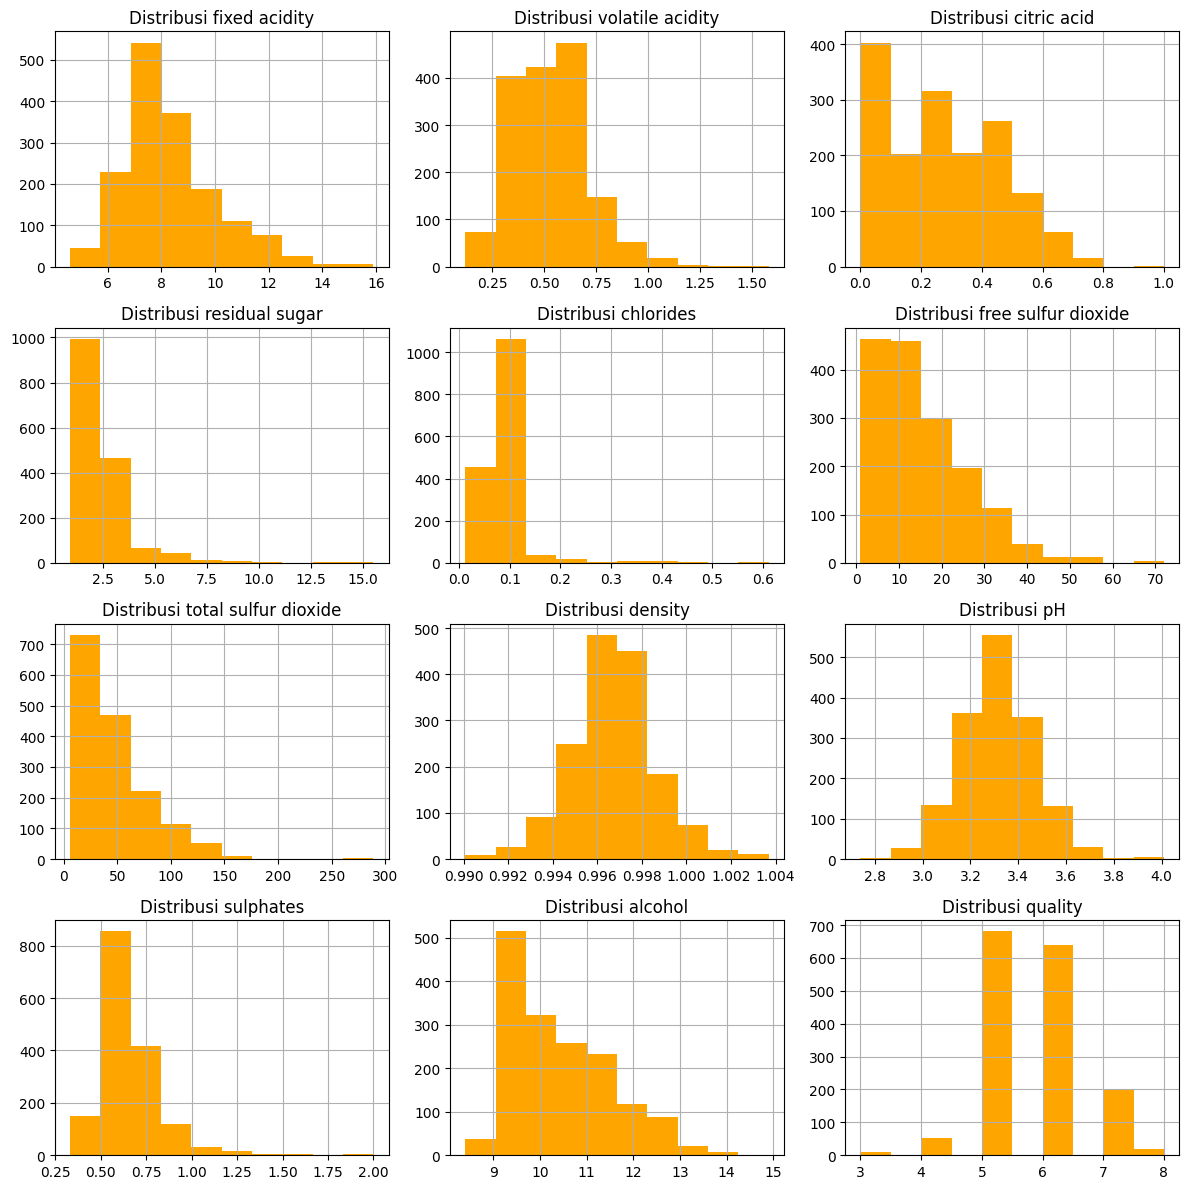

In [ ]:
import os
import math
import matplotlib.pyplot as plt
import pandas as pd

n_cols = 3

n_rows = math.ceil(len(df_wine.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))

axes = axes.flatten()

for i, col in enumerate(df_wine.columns):
  df_wine[col].hist(bins=10, ax=axes[i], color='orange')
  axes[i].set_title(f'Distribusi {col}')

for j in range(i + 1, len(axes)):
  fig.plt.delaxes(axes[j])

plt.tight_layout()
plt.show()

Berdasarkan distribusi diatas, terdapat beberapa fitur seperti *density* dan *pH* memiliki bentuk distribusi yang normal. Akan tetapi pada fitur lainnya, seperti *alcohol*, *residual sugar* memiliki skewed ke kanan dan fitur seperti *chlorides* memiliki skewed ke kiri.

**Bivariete Analysis**

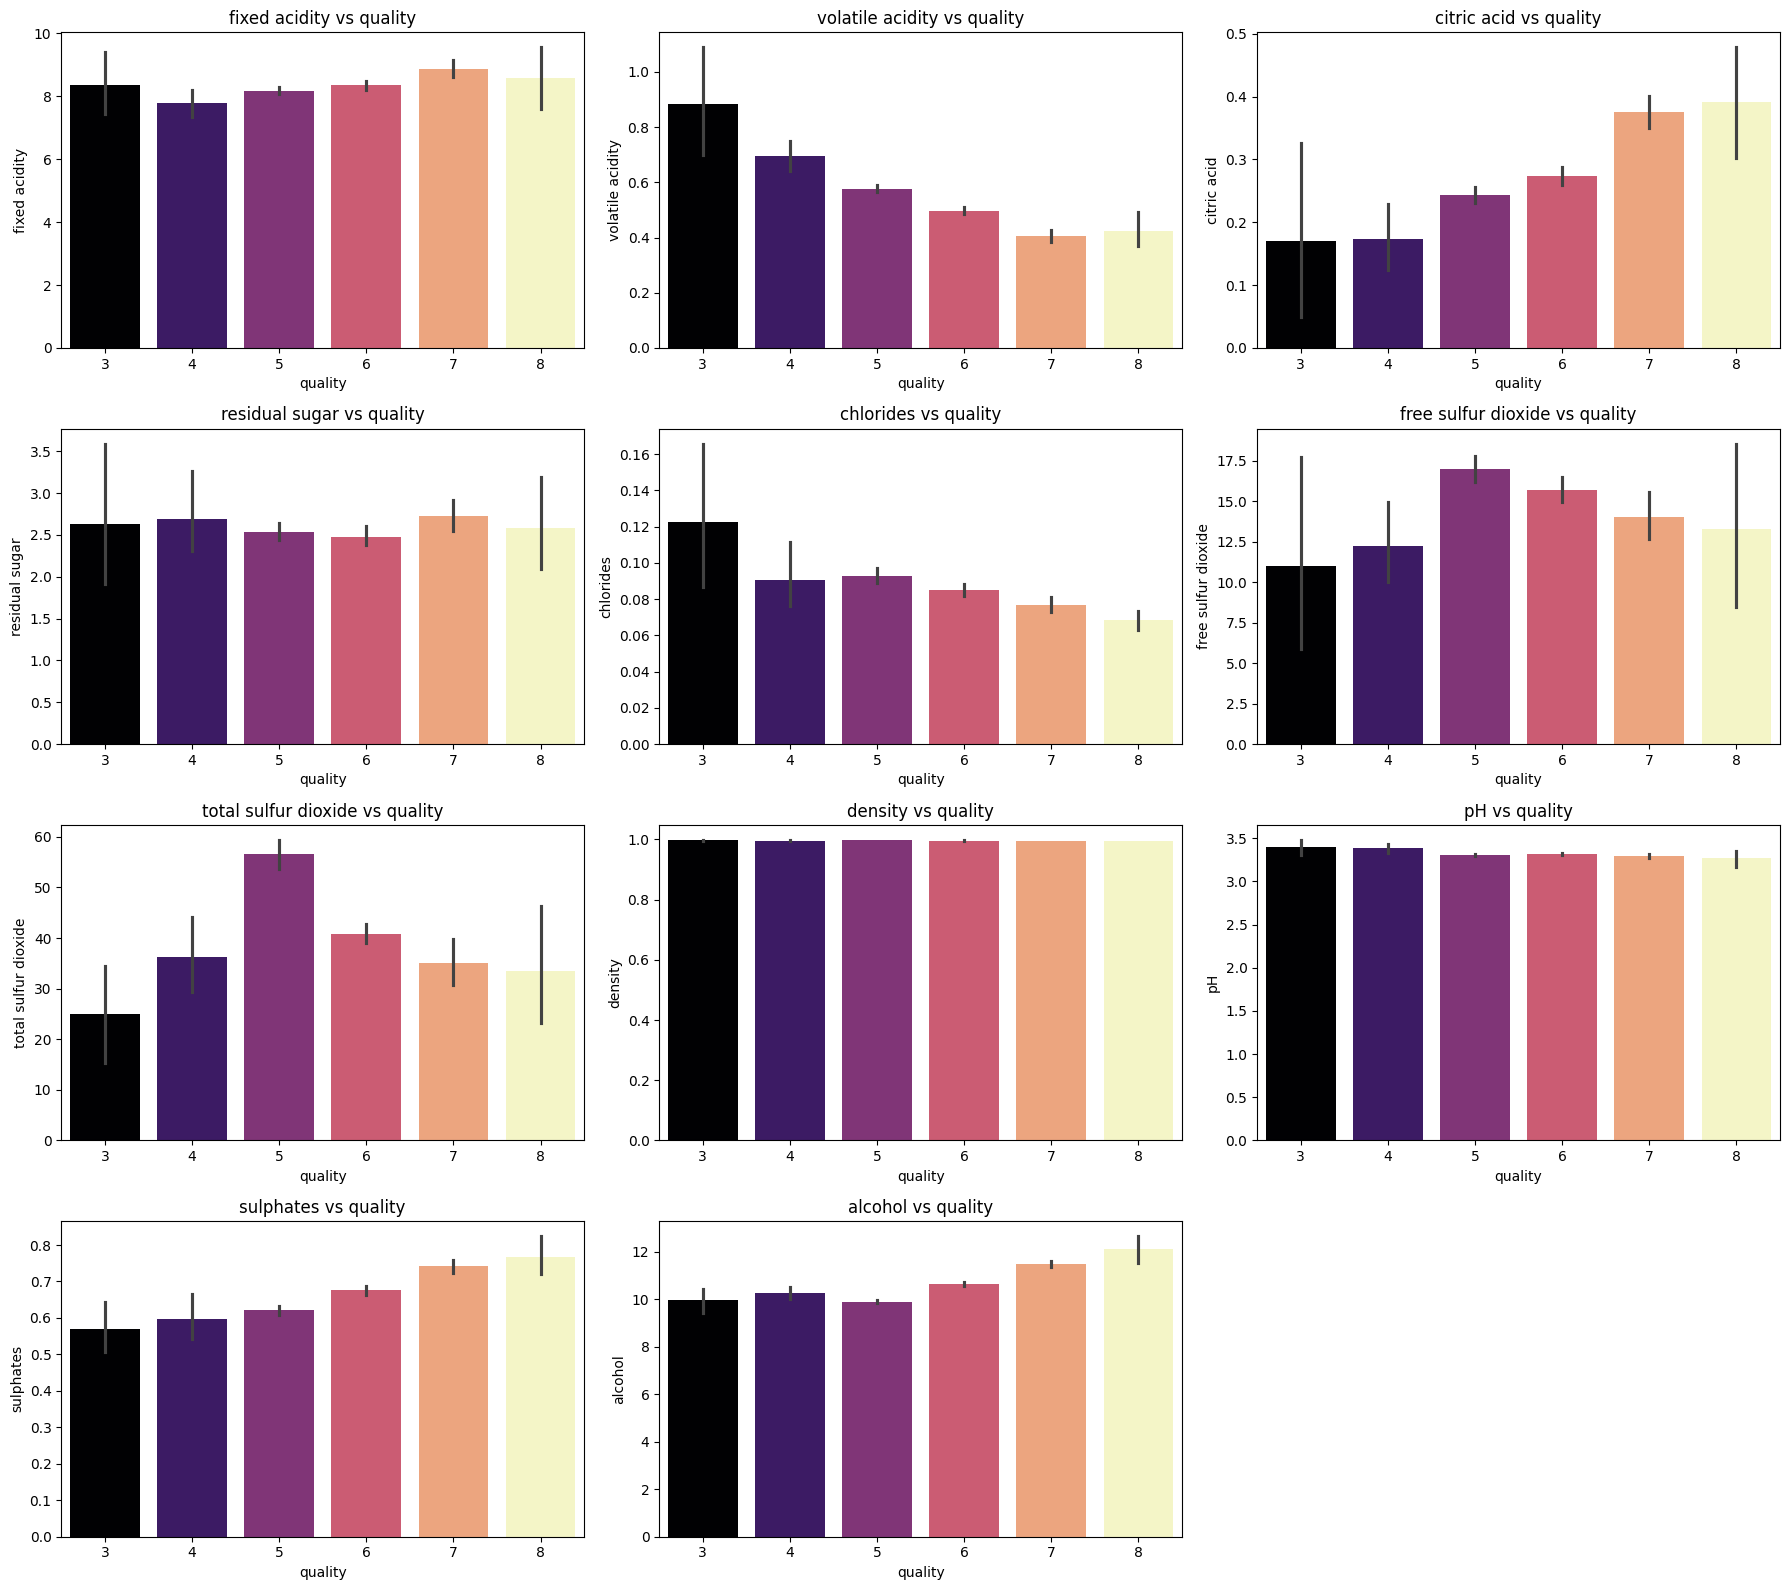

In [ ]:
n_cols = 3

n_rows = math.ceil((len(df_wine.columns) - 1) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))

axes = axes.flatten()

cols = [col for col in df_wine.columns if col != 'quality']

for i, col in enumerate(cols):
  sns.barplot(x='quality', y=col, data=df_wine, ax=axes[i], hue='quality', palette='magma', legend=False)
  axes[i].set_title(f'{col} vs quality')

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Pada diagram diatas, dapat dilihat bahwa beberapa fitur seperti *alcohol*, *sulphates*, *citric acid* dan *volatile acidity* sangat mempengaruhi kualitas anggur antara baik atau buruk.

**Memeriksa Outlier**

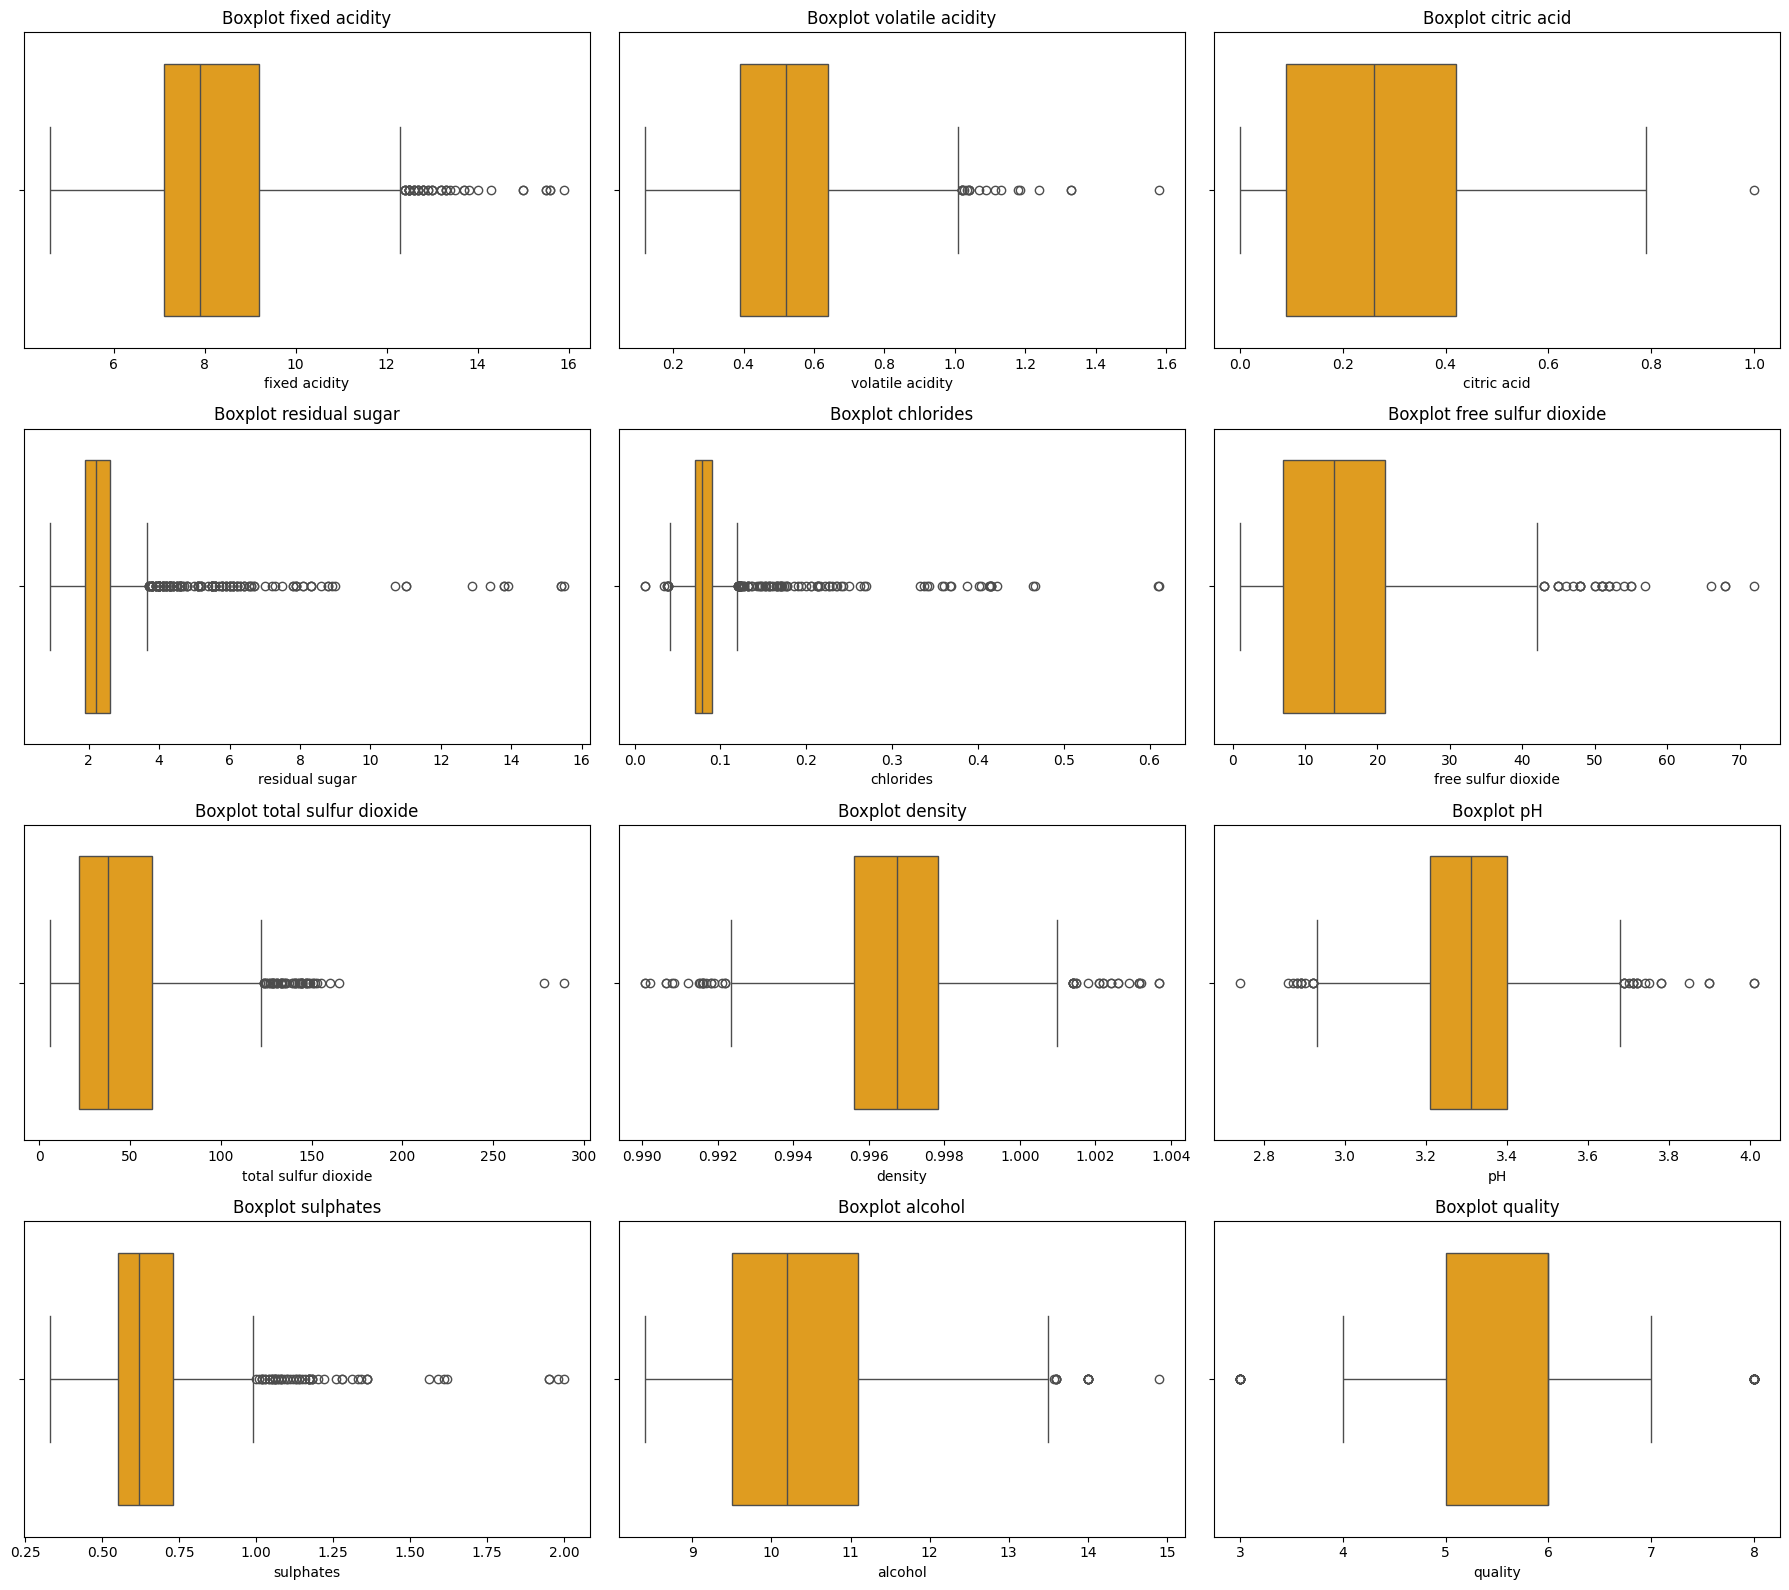

In [ ]:
n_cols = 3

n_rows = math.ceil(len(df_wine.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))

axes = axes.flatten()

for i, col in enumerate(df_wine.columns):
  sns.boxplot(x=col, data=df_wine, ax=axes[i], color='orange')
  axes[i].set_title(f'Boxplot {col}')

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Boxplot diatas menunjukkan bahwa terdapat beberapa fitur seperti *alcohol* atau *sulphates* memiliki outlier. Maka dari itu perlu dilakukan penganganan outlier pada data processing.

**Correlation Matrix**

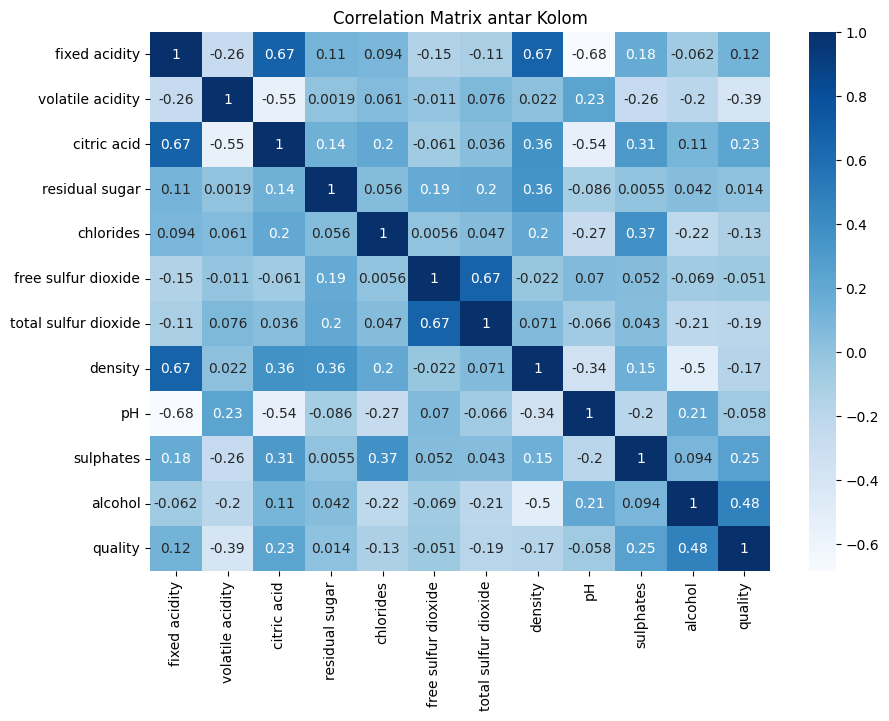

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_wine.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix antar Kolom')
plt.show()

Berdasarkan correlation matrix diatas, ditunjukkan bahwa fitur seperti *alcohol* dan *sulphates* memiliki korelasi yang tinggi terhadap kualitas anggur.

## Data Preparation

**Menghapus Data Duplikat**

In [10]:
df_cleaned = df_wine.copy()

df_cleaned = df_cleaned.drop_duplicates()

In [11]:
print("\nJumlah data duplikat yang sudah dihapus : ")
print(df_cleaned.duplicated().sum())


Jumlah data duplikat yang sudah dihapus : 
0


**Menangani Outlier**

In [12]:
corr = df_wine.corr()['quality'].sort_values(ascending=False)
corr.head(12)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


In [13]:
cols_select = corr[abs(corr) > 0.2].index.tolist()
cols_select.remove('quality')
cols_select

['alcohol', 'sulphates', 'citric acid', 'volatile acidity']

In [14]:
for i in cols_select:
  Q1 = df_cleaned[i].quantile(0.25)
  Q3 = df_cleaned[i].quantile(0.75)
  IQR = Q3 - Q1
  df_cleaned = df_cleaned[~((df_cleaned[i] < (Q1 - 1.5 * IQR)) | (df_cleaned[i] > (Q3 + 1.5 * IQR)))]

In [15]:
df_cleaned['quality'] = pd.cut(df_cleaned['quality'], bins=[0, 4, 6, 10], labels=['buruk', 'sedang', 'baik'])
df_cleaned.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,sedang
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,sedang
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,sedang
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,sedang
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,sedang


In [16]:
df_cleaned['quality'].value_counts()

,count
quality,
sedang,1050
baik,167
buruk,51


In [17]:
df_cleaned['quality'] = df_cleaned['quality'].map({'buruk' : 0, 'sedang': 1, 'baik' : 2})

In [18]:
df_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [19]:
X = df_cleaned.drop('quality', axis=1)
y = df_cleaned['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=14)

In [20]:
scaled = StandardScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

## Modelling

**Model KNN**

In [21]:
y_predict_list = []

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)
y_predict_list.append(y_predict)

print(f'Accuracy Score : {accuracy_score(y_test, y_predict)}')

print(f'Confusion Matrix : \n{confusion_matrix(y_test, y_predict)}')

print(f'Classification Report : \n{classification_report(y_test, y_predict)}')

Accuracy Score : 0.84251968503937
Confusion Matrix : 
[[  0   8   0]
 [  2 204  13]
 [  1  16  10]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      0.93      0.91       219
           2       0.43      0.37      0.40        27

    accuracy                           0.84       254
   macro avg       0.44      0.43      0.44       254
weighted avg       0.82      0.84      0.83       254



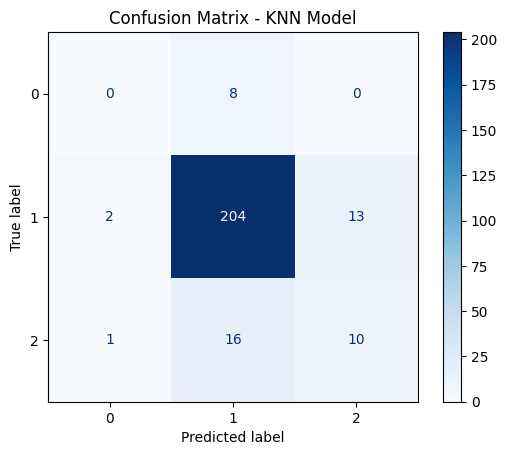

In [27]:
cm_knn = confusion_matrix(y_test, y_predict_list[0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN Model')
plt.show()

**Model SVC**

In [23]:
from sklearn.svm import  SVC

svc_model = SVC(C=0.1, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
y_predict_list.append(y_predict)

print(f'Accuracy Score : {accuracy_score(y_test, y_predict)}')

print(f'Confusion Matrix : \n{confusion_matrix(y_test, y_predict)}')

print(f'Classification Report : \n{classification_report(y_test, y_predict, zero_division=0)}')

Accuracy Score : 0.8622047244094488
Confusion Matrix : 
[[  0   8   0]
 [  0 219   0]
 [  0  27   0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.86      1.00      0.93       219
           2       0.00      0.00      0.00        27

    accuracy                           0.86       254
   macro avg       0.29      0.33      0.31       254
weighted avg       0.74      0.86      0.80       254



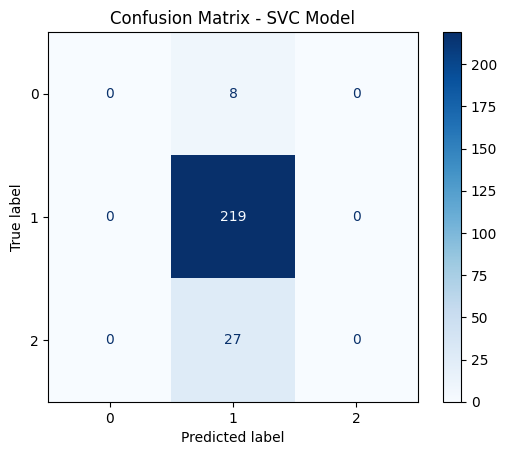

In [28]:
cm_svc = confusion_matrix(y_test, y_predict_list[1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVC Model')
plt.show()

**Model Random Forest**

In [24]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
y_predict_list.append(y_predict)

print(f'Accuracy Score : {accuracy_score(y_test, y_predict)}')

print(f'Confusion Matrix : \n{confusion_matrix(y_test, y_predict)}')

print(f'Classification Report : \n{classification_report(y_test, y_predict, zero_division=0)}')

Accuracy Score : 0.8661417322834646
Confusion Matrix : 
[[  0   8   0]
 [  0 211   8]
 [  0  18   9]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      0.96      0.93       219
           2       0.53      0.33      0.41        27

    accuracy                           0.87       254
   macro avg       0.47      0.43      0.44       254
weighted avg       0.82      0.87      0.84       254



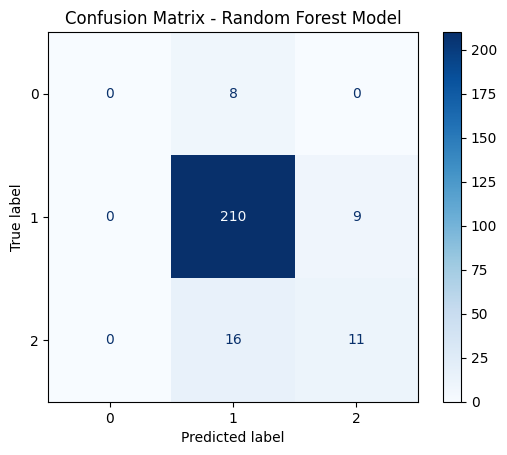

In [29]:
cm_rf = confusion_matrix(y_test, y_predict_list[2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

## Evaluation

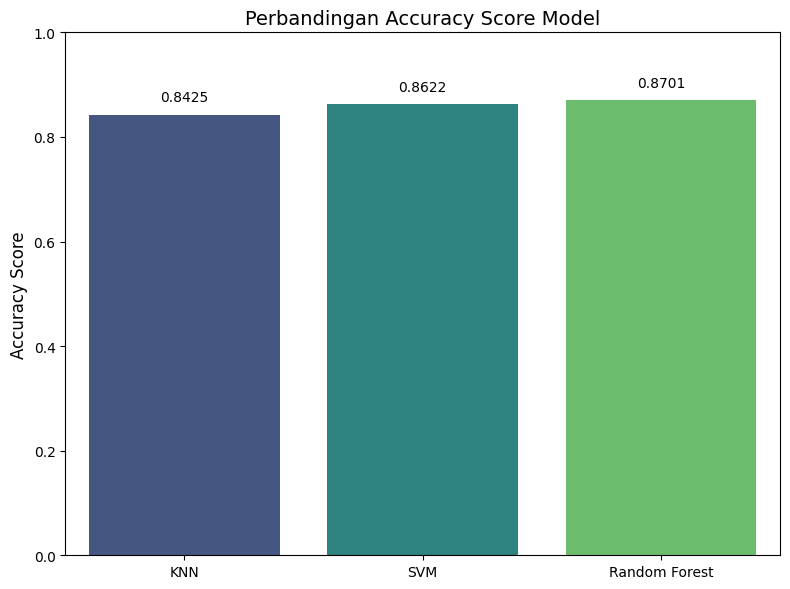


Hasil Accuracy Score:
KNN: 0.8425
SVM: 0.8622
Random Forest: 0.8701


In [25]:
# Model KNN
y_predict_list = []

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)
y_predict_list.append(y_predict)

# Model SVC
from sklearn.svm import  SVC

svc_model = SVC(C=0.1, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
y_predict_list.append(y_predict)

# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
y_predict_list.append(y_predict)

# Evaluation
models = ['KNN', 'SVM', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, y_pred) for y_pred in y_predict_list]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title('Perbandingan Accuracy Score Model', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)

# Tambahkan teks untuk menampilkan akurasi di bawah plot
for i, accuracy in enumerate(accuracy_scores):
    plt.text(i, accuracy + 0.02, f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Menampilkan akurasi di output terpisah juga
print("\nHasil Accuracy Score:")
for model, accuracy in zip(models, accuracy_scores):
    print(f"{model}: {accuracy:.4f}")

## Conclusion

Dari ketiga  model yang dibandingkan
* Random Forest Model menunjukkan performa terbaik dalam hal accuracy score, dengan nilai tertinggi yaitu 0.8780.
* SVM Model berada pada urutan kedua dengan accuracy score 0.8622.
* KNN Model dengan accuracy score terendah diantara ketiganya yaitu 0.8425

Maka dari itu, jika matrik utama adalah accuracy, maka Random Forest Model adalah yang paling baik diantara ketiga model ini pada dataset yang diuji.